<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548


0:	learn: 0.9796625	total: 50.7ms	remaining: 50.7s
1:	learn: 0.9577818	total: 53.9ms	remaining: 26.9s
2:	learn: 0.9361996	total: 56.6ms	remaining: 18.8s
3:	learn: 0.9207737	total: 59ms	remaining: 14.7s
4:	learn: 0.9027638	total: 60.8ms	remaining: 12.1s
5:	learn: 0.8853688	total: 62.5ms	remaining: 10.4s
6:	learn: 0.8682355	total: 64ms	remaining: 9.09s
7:	learn: 0.8512958	total: 65.9ms	remaining: 8.16s
8:	learn: 0.8359103	total: 68.6ms	remaining: 7.55s
9:	learn: 0.8189966	total: 72.3ms	remaining: 7.15s
10:	learn: 0.8026523	total: 74.1ms	remaining: 6.66s
11:	learn: 0.7902194	total: 77.1ms	remaining: 6.34s
12:	learn: 0.7751013	total: 80.7ms	remaining: 6.13s
13:	learn: 0.7602805	total: 83.5ms	remaining: 5.88s
14:	learn: 0.7465652	total: 86.1ms	remaining: 5.65s
15:	learn: 0.7325030	total: 89ms	remaining: 5.47s
16:	learn: 0.7203550	total: 92.5ms	remaining: 5.35s
17:	learn: 0.7080774	total: 94.4ms	remaining: 5.15s
18:	learn: 0.6957380	total: 97ms	remaining: 5.01s
19:	learn: 0.6848679	total: 99

52:	learn: 0.4316691	total: 180ms	remaining: 3.22s
53:	learn: 0.4276966	total: 183ms	remaining: 3.2s
54:	learn: 0.4230959	total: 184ms	remaining: 3.17s
55:	learn: 0.4189752	total: 186ms	remaining: 3.13s
56:	learn: 0.4152739	total: 188ms	remaining: 3.12s
57:	learn: 0.4109921	total: 191ms	remaining: 3.1s
58:	learn: 0.4079470	total: 193ms	remaining: 3.07s
59:	learn: 0.4042350	total: 194ms	remaining: 3.04s
60:	learn: 0.4004834	total: 197ms	remaining: 3.03s
61:	learn: 0.3975773	total: 198ms	remaining: 3s
62:	learn: 0.3948837	total: 201ms	remaining: 2.99s
63:	learn: 0.3913591	total: 203ms	remaining: 2.96s
64:	learn: 0.3884272	total: 204ms	remaining: 2.94s
65:	learn: 0.3857041	total: 206ms	remaining: 2.92s
66:	learn: 0.3822047	total: 208ms	remaining: 2.89s
67:	learn: 0.3798354	total: 211ms	remaining: 2.89s
68:	learn: 0.3769949	total: 212ms	remaining: 2.86s
69:	learn: 0.3737385	total: 214ms	remaining: 2.84s
70:	learn: 0.3710872	total: 217ms	remaining: 2.83s
71:	learn: 0.3680402	total: 219ms	re

75:	learn: 0.3566090	total: 233ms	remaining: 2.83s
76:	learn: 0.3543772	total: 235ms	remaining: 2.82s
77:	learn: 0.3521496	total: 237ms	remaining: 2.81s
78:	learn: 0.3501457	total: 240ms	remaining: 2.79s
79:	learn: 0.3477105	total: 242ms	remaining: 2.79s
80:	learn: 0.3452793	total: 245ms	remaining: 2.78s
81:	learn: 0.3432498	total: 248ms	remaining: 2.78s
82:	learn: 0.3411627	total: 251ms	remaining: 2.77s
83:	learn: 0.3386541	total: 253ms	remaining: 2.76s
84:	learn: 0.3365275	total: 256ms	remaining: 2.75s
85:	learn: 0.3342133	total: 259ms	remaining: 2.75s
86:	learn: 0.3320469	total: 262ms	remaining: 2.75s
87:	learn: 0.3299170	total: 264ms	remaining: 2.74s
88:	learn: 0.3277398	total: 268ms	remaining: 2.74s
89:	learn: 0.3260229	total: 270ms	remaining: 2.73s
90:	learn: 0.3235160	total: 273ms	remaining: 2.73s
91:	learn: 0.3210311	total: 276ms	remaining: 2.72s
92:	learn: 0.3195901	total: 278ms	remaining: 2.71s
93:	learn: 0.3179567	total: 281ms	remaining: 2.71s
94:	learn: 0.3161266	total: 284

96:	learn: 0.3139656	total: 289ms	remaining: 2.69s
97:	learn: 0.3125825	total: 292ms	remaining: 2.69s
98:	learn: 0.3114397	total: 294ms	remaining: 2.67s
99:	learn: 0.3098140	total: 297ms	remaining: 2.67s
100:	learn: 0.3088458	total: 299ms	remaining: 2.66s
101:	learn: 0.3064187	total: 302ms	remaining: 2.65s
102:	learn: 0.3052302	total: 304ms	remaining: 2.65s
103:	learn: 0.3040942	total: 307ms	remaining: 2.64s
104:	learn: 0.3027792	total: 309ms	remaining: 2.64s
105:	learn: 0.3018074	total: 312ms	remaining: 2.63s
106:	learn: 0.2999458	total: 314ms	remaining: 2.62s
107:	learn: 0.2987617	total: 317ms	remaining: 2.62s
108:	learn: 0.2970243	total: 319ms	remaining: 2.61s
109:	learn: 0.2953015	total: 322ms	remaining: 2.6s
110:	learn: 0.2942013	total: 324ms	remaining: 2.6s
111:	learn: 0.2920319	total: 327ms	remaining: 2.59s
112:	learn: 0.2911082	total: 329ms	remaining: 2.58s
113:	learn: 0.2900772	total: 332ms	remaining: 2.58s
114:	learn: 0.2889516	total: 335ms	remaining: 2.58s
115:	learn: 0.2873

119:	learn: 0.2824469	total: 345ms	remaining: 2.53s
120:	learn: 0.2815670	total: 348ms	remaining: 2.53s
121:	learn: 0.2805411	total: 350ms	remaining: 2.52s
122:	learn: 0.2790770	total: 353ms	remaining: 2.52s
123:	learn: 0.2778760	total: 356ms	remaining: 2.51s
124:	learn: 0.2762405	total: 358ms	remaining: 2.51s
125:	learn: 0.2760339	total: 359ms	remaining: 2.49s
126:	learn: 0.2751058	total: 361ms	remaining: 2.48s
127:	learn: 0.2743673	total: 364ms	remaining: 2.48s
128:	learn: 0.2731320	total: 367ms	remaining: 2.47s
129:	learn: 0.2723013	total: 369ms	remaining: 2.47s
130:	learn: 0.2710996	total: 372ms	remaining: 2.47s
131:	learn: 0.2702552	total: 374ms	remaining: 2.46s
132:	learn: 0.2696049	total: 377ms	remaining: 2.46s
133:	learn: 0.2682317	total: 379ms	remaining: 2.45s
134:	learn: 0.2667246	total: 382ms	remaining: 2.45s
135:	learn: 0.2664872	total: 383ms	remaining: 2.43s
136:	learn: 0.2653838	total: 384ms	remaining: 2.42s
137:	learn: 0.2642117	total: 387ms	remaining: 2.41s
138:	learn: 

169:	learn: 0.2413311	total: 471ms	remaining: 2.3s
170:	learn: 0.2409387	total: 477ms	remaining: 2.31s
171:	learn: 0.2403917	total: 484ms	remaining: 2.33s
172:	learn: 0.2393309	total: 488ms	remaining: 2.33s
173:	learn: 0.2383207	total: 491ms	remaining: 2.33s
174:	learn: 0.2377193	total: 493ms	remaining: 2.33s
175:	learn: 0.2369776	total: 496ms	remaining: 2.32s
176:	learn: 0.2359764	total: 498ms	remaining: 2.32s
177:	learn: 0.2353758	total: 500ms	remaining: 2.31s
178:	learn: 0.2346678	total: 507ms	remaining: 2.33s
179:	learn: 0.2339484	total: 513ms	remaining: 2.33s
180:	learn: 0.2336423	total: 515ms	remaining: 2.33s
181:	learn: 0.2333444	total: 517ms	remaining: 2.33s


182:	learn: 0.2327466	total: 525ms	remaining: 2.35s
183:	learn: 0.2321123	total: 528ms	remaining: 2.34s
184:	learn: 0.2319199	total: 532ms	remaining: 2.34s
185:	learn: 0.2314810	total: 535ms	remaining: 2.34s
186:	learn: 0.2305970	total: 539ms	remaining: 2.34s
187:	learn: 0.2300705	total: 541ms	remaining: 2.34s
188:	learn: 0.2293894	total: 545ms	remaining: 2.34s
189:	learn: 0.2288606	total: 548ms	remaining: 2.33s
190:	learn: 0.2284359	total: 550ms	remaining: 2.33s
191:	learn: 0.2276516	total: 553ms	remaining: 2.33s
192:	learn: 0.2269773	total: 555ms	remaining: 2.32s
193:	learn: 0.2267291	total: 556ms	remaining: 2.31s
194:	learn: 0.2261515	total: 559ms	remaining: 2.31s
195:	learn: 0.2255571	total: 563ms	remaining: 2.31s
196:	learn: 0.2252984	total: 566ms	remaining: 2.31s
197:	learn: 0.2247492	total: 568ms	remaining: 2.3s
198:	learn: 0.2240686	total: 570ms	remaining: 2.29s
199:	learn: 0.2233582	total: 573ms	remaining: 2.29s
200:	learn: 0.2231596	total: 576ms	remaining: 2.29s
201:	learn: 0

216:	learn: 0.2158571	total: 620ms	remaining: 2.24s
217:	learn: 0.2151495	total: 624ms	remaining: 2.24s
218:	learn: 0.2148169	total: 627ms	remaining: 2.23s
219:	learn: 0.2143714	total: 629ms	remaining: 2.23s
220:	learn: 0.2141081	total: 632ms	remaining: 2.23s
221:	learn: 0.2133514	total: 633ms	remaining: 2.22s
222:	learn: 0.2128763	total: 636ms	remaining: 2.21s
223:	learn: 0.2122371	total: 639ms	remaining: 2.21s
224:	learn: 0.2115644	total: 641ms	remaining: 2.21s
225:	learn: 0.2111943	total: 644ms	remaining: 2.2s
226:	learn: 0.2106467	total: 646ms	remaining: 2.2s
227:	learn: 0.2098898	total: 649ms	remaining: 2.2s
228:	learn: 0.2094012	total: 652ms	remaining: 2.2s
229:	learn: 0.2089154	total: 655ms	remaining: 2.19s
230:	learn: 0.2086069	total: 658ms	remaining: 2.19s
231:	learn: 0.2079212	total: 661ms	remaining: 2.19s
232:	learn: 0.2078195	total: 662ms	remaining: 2.18s
233:	learn: 0.2074910	total: 665ms	remaining: 2.18s
234:	learn: 0.2072033	total: 667ms	remaining: 2.17s
235:	learn: 0.20

240:	learn: 0.2044773	total: 683ms	remaining: 2.15s
241:	learn: 0.2038285	total: 688ms	remaining: 2.15s
242:	learn: 0.2036137	total: 693ms	remaining: 2.16s
243:	learn: 0.2032267	total: 697ms	remaining: 2.16s
244:	learn: 0.2024427	total: 700ms	remaining: 2.16s
245:	learn: 0.2019471	total: 703ms	remaining: 2.15s
246:	learn: 0.2015954	total: 705ms	remaining: 2.15s
247:	learn: 0.2011715	total: 707ms	remaining: 2.14s
248:	learn: 0.2008159	total: 710ms	remaining: 2.14s
249:	learn: 0.2006331	total: 712ms	remaining: 2.14s
250:	learn: 0.2001485	total: 715ms	remaining: 2.13s
251:	learn: 0.1999010	total: 716ms	remaining: 2.13s
252:	learn: 0.1997962	total: 719ms	remaining: 2.12s
253:	learn: 0.1990162	total: 725ms	remaining: 2.13s
254:	learn: 0.1984193	total: 729ms	remaining: 2.13s
255:	learn: 0.1979216	total: 734ms	remaining: 2.13s
256:	learn: 0.1973190	total: 737ms	remaining: 2.13s
257:	learn: 0.1970671	total: 739ms	remaining: 2.13s
258:	learn: 0.1969685	total: 743ms	remaining: 2.13s
259:	learn: 

268:	learn: 0.1927509	total: 784ms	remaining: 2.13s
269:	learn: 0.1926208	total: 787ms	remaining: 2.13s
270:	learn: 0.1922426	total: 790ms	remaining: 2.13s
271:	learn: 0.1915695	total: 793ms	remaining: 2.12s
272:	learn: 0.1914439	total: 795ms	remaining: 2.12s
273:	learn: 0.1907495	total: 797ms	remaining: 2.11s
274:	learn: 0.1904492	total: 801ms	remaining: 2.11s
275:	learn: 0.1903331	total: 806ms	remaining: 2.11s
276:	learn: 0.1899281	total: 823ms	remaining: 2.15s
277:	learn: 0.1896390	total: 826ms	remaining: 2.14s
278:	learn: 0.1895726	total: 827ms	remaining: 2.14s
279:	learn: 0.1894452	total: 830ms	remaining: 2.13s
280:	learn: 0.1886666	total: 832ms	remaining: 2.13s
281:	learn: 0.1880012	total: 835ms	remaining: 2.13s
282:	learn: 0.1874125	total: 837ms	remaining: 2.12s
283:	learn: 0.1873425	total: 839ms	remaining: 2.11s
284:	learn: 0.1867006	total: 841ms	remaining: 2.11s
285:	learn: 0.1859213	total: 844ms	remaining: 2.11s
286:	learn: 0.1852557	total: 847ms	remaining: 2.1s
287:	learn: 0

288:	learn: 0.1840397	total: 853ms	remaining: 2.1s
289:	learn: 0.1833686	total: 868ms	remaining: 2.13s
290:	learn: 0.1829120	total: 870ms	remaining: 2.12s
291:	learn: 0.1825867	total: 873ms	remaining: 2.12s
292:	learn: 0.1820052	total: 875ms	remaining: 2.11s
293:	learn: 0.1815523	total: 878ms	remaining: 2.11s
294:	learn: 0.1810458	total: 880ms	remaining: 2.1s
295:	learn: 0.1805738	total: 883ms	remaining: 2.1s
296:	learn: 0.1801678	total: 884ms	remaining: 2.09s
297:	learn: 0.1797581	total: 887ms	remaining: 2.09s
298:	learn: 0.1791867	total: 890ms	remaining: 2.08s
299:	learn: 0.1786337	total: 893ms	remaining: 2.08s
300:	learn: 0.1780234	total: 896ms	remaining: 2.08s
301:	learn: 0.1775378	total: 898ms	remaining: 2.08s
302:	learn: 0.1769092	total: 908ms	remaining: 2.09s
303:	learn: 0.1767980	total: 910ms	remaining: 2.08s
304:	learn: 0.1764384	total: 913ms	remaining: 2.08s
305:	learn: 0.1763028	total: 915ms	remaining: 2.08s
306:	learn: 0.1757663	total: 918ms	remaining: 2.07s
307:	learn: 0.1

318:	learn: 0.1716812	total: 981ms	remaining: 2.09s
319:	learn: 0.1712942	total: 995ms	remaining: 2.11s
320:	learn: 0.1707819	total: 998ms	remaining: 2.11s
321:	learn: 0.1707156	total: 1s	remaining: 2.11s


322:	learn: 0.1702935	total: 1.02s	remaining: 2.14s
323:	learn: 0.1699067	total: 1.02s	remaining: 2.14s
324:	learn: 0.1694421	total: 1.03s	remaining: 2.13s
325:	learn: 0.1689954	total: 1.03s	remaining: 2.13s
326:	learn: 0.1686345	total: 1.03s	remaining: 2.13s
327:	learn: 0.1681206	total: 1.03s	remaining: 2.12s
328:	learn: 0.1676919	total: 1.04s	remaining: 2.12s
329:	learn: 0.1671222	total: 1.04s	remaining: 2.12s
330:	learn: 0.1668068	total: 1.04s	remaining: 2.11s
331:	learn: 0.1665388	total: 1.05s	remaining: 2.11s
332:	learn: 0.1661615	total: 1.05s	remaining: 2.1s
333:	learn: 0.1657559	total: 1.05s	remaining: 2.1s
334:	learn: 0.1653430	total: 1.06s	remaining: 2.1s
335:	learn: 0.1648849	total: 1.06s	remaining: 2.09s
336:	learn: 0.1643955	total: 1.06s	remaining: 2.09s
337:	learn: 0.1638801	total: 1.06s	remaining: 2.08s
338:	learn: 0.1631290	total: 1.06s	remaining: 2.08s
339:	learn: 0.1626797	total: 1.07s	remaining: 2.07s
340:	learn: 0.1622765	total: 1.07s	remaining: 2.07s
341:	learn: 0.1

364:	learn: 0.1537145	total: 1.14s	remaining: 1.98s
365:	learn: 0.1532917	total: 1.15s	remaining: 1.99s
366:	learn: 0.1528702	total: 1.15s	remaining: 1.99s
367:	learn: 0.1524711	total: 1.16s	remaining: 1.99s
368:	learn: 0.1521164	total: 1.16s	remaining: 1.98s
369:	learn: 0.1516666	total: 1.16s	remaining: 1.98s
370:	learn: 0.1513729	total: 1.16s	remaining: 1.97s
371:	learn: 0.1511603	total: 1.17s	remaining: 1.97s
372:	learn: 0.1507762	total: 1.17s	remaining: 1.96s
373:	learn: 0.1504972	total: 1.17s	remaining: 1.96s
374:	learn: 0.1504444	total: 1.17s	remaining: 1.96s
375:	learn: 0.1500564	total: 1.18s	remaining: 1.95s
376:	learn: 0.1498449	total: 1.18s	remaining: 1.95s
377:	learn: 0.1495006	total: 1.18s	remaining: 1.94s


378:	learn: 0.1492409	total: 1.19s	remaining: 1.94s
379:	learn: 0.1488999	total: 1.19s	remaining: 1.94s
380:	learn: 0.1488539	total: 1.19s	remaining: 1.93s
381:	learn: 0.1488021	total: 1.19s	remaining: 1.93s
382:	learn: 0.1484655	total: 1.2s	remaining: 1.93s
383:	learn: 0.1482674	total: 1.2s	remaining: 1.92s
384:	learn: 0.1481477	total: 1.2s	remaining: 1.92s
385:	learn: 0.1477733	total: 1.2s	remaining: 1.91s
386:	learn: 0.1473569	total: 1.21s	remaining: 1.91s
387:	learn: 0.1470767	total: 1.22s	remaining: 1.93s
388:	learn: 0.1467726	total: 1.23s	remaining: 1.93s
389:	learn: 0.1463735	total: 1.23s	remaining: 1.92s
390:	learn: 0.1463360	total: 1.23s	remaining: 1.92s
391:	learn: 0.1462893	total: 1.23s	remaining: 1.91s
392:	learn: 0.1457725	total: 1.24s	remaining: 1.91s
393:	learn: 0.1454195	total: 1.24s	remaining: 1.91s
394:	learn: 0.1451985	total: 1.24s	remaining: 1.91s
395:	learn: 0.1451520	total: 1.25s	remaining: 1.9s


396:	learn: 0.1447022	total: 1.25s	remaining: 1.9s
397:	learn: 0.1442875	total: 1.25s	remaining: 1.89s
398:	learn: 0.1442422	total: 1.25s	remaining: 1.89s
399:	learn: 0.1438566	total: 1.26s	remaining: 1.89s
400:	learn: 0.1434830	total: 1.26s	remaining: 1.88s
401:	learn: 0.1430842	total: 1.26s	remaining: 1.88s
402:	learn: 0.1428107	total: 1.27s	remaining: 1.88s
403:	learn: 0.1425597	total: 1.27s	remaining: 1.87s
404:	learn: 0.1422761	total: 1.27s	remaining: 1.87s


405:	learn: 0.1420256	total: 1.28s	remaining: 1.87s
406:	learn: 0.1416180	total: 1.28s	remaining: 1.86s
407:	learn: 0.1411890	total: 1.28s	remaining: 1.86s
408:	learn: 0.1411470	total: 1.28s	remaining: 1.86s
409:	learn: 0.1408161	total: 1.29s	remaining: 1.85s
410:	learn: 0.1406024	total: 1.29s	remaining: 1.85s
411:	learn: 0.1402713	total: 1.29s	remaining: 1.84s
412:	learn: 0.1400719	total: 1.29s	remaining: 1.84s
413:	learn: 0.1397200	total: 1.3s	remaining: 1.84s
414:	learn: 0.1396781	total: 1.3s	remaining: 1.83s
415:	learn: 0.1393182	total: 1.31s	remaining: 1.83s
416:	learn: 0.1392773	total: 1.31s	remaining: 1.83s
417:	learn: 0.1389931	total: 1.31s	remaining: 1.83s
418:	learn: 0.1387029	total: 1.31s	remaining: 1.82s
419:	learn: 0.1381909	total: 1.32s	remaining: 1.82s
420:	learn: 0.1377920	total: 1.32s	remaining: 1.82s
421:	learn: 0.1373697	total: 1.33s	remaining: 1.82s
422:	learn: 0.1369857	total: 1.33s	remaining: 1.81s
423:	learn: 0.1367075	total: 1.33s	remaining: 1.81s
424:	learn: 0.

444:	learn: 0.1320408	total: 1.39s	remaining: 1.74s
445:	learn: 0.1317483	total: 1.4s	remaining: 1.74s
446:	learn: 0.1314319	total: 1.4s	remaining: 1.73s
447:	learn: 0.1312751	total: 1.4s	remaining: 1.73s
448:	learn: 0.1311274	total: 1.41s	remaining: 1.73s
449:	learn: 0.1306097	total: 1.41s	remaining: 1.72s
450:	learn: 0.1305799	total: 1.41s	remaining: 1.72s
451:	learn: 0.1304810	total: 1.41s	remaining: 1.71s
452:	learn: 0.1302043	total: 1.42s	remaining: 1.71s
453:	learn: 0.1299451	total: 1.42s	remaining: 1.71s
454:	learn: 0.1296210	total: 1.42s	remaining: 1.7s
455:	learn: 0.1293576	total: 1.42s	remaining: 1.7s
456:	learn: 0.1291812	total: 1.43s	remaining: 1.69s
457:	learn: 0.1288854	total: 1.43s	remaining: 1.69s
458:	learn: 0.1283847	total: 1.43s	remaining: 1.69s
459:	learn: 0.1282631	total: 1.43s	remaining: 1.68s


460:	learn: 0.1282329	total: 1.44s	remaining: 1.68s
461:	learn: 0.1279786	total: 1.44s	remaining: 1.68s
462:	learn: 0.1277058	total: 1.44s	remaining: 1.67s
463:	learn: 0.1274236	total: 1.45s	remaining: 1.67s
464:	learn: 0.1271793	total: 1.47s	remaining: 1.7s
465:	learn: 0.1266640	total: 1.48s	remaining: 1.69s
466:	learn: 0.1263668	total: 1.48s	remaining: 1.69s
467:	learn: 0.1263414	total: 1.48s	remaining: 1.68s
468:	learn: 0.1260843	total: 1.48s	remaining: 1.68s
469:	learn: 0.1257919	total: 1.49s	remaining: 1.68s
470:	learn: 0.1255753	total: 1.49s	remaining: 1.67s
471:	learn: 0.1252814	total: 1.49s	remaining: 1.67s
472:	learn: 0.1251566	total: 1.51s	remaining: 1.68s
473:	learn: 0.1247287	total: 1.51s	remaining: 1.68s
474:	learn: 0.1244627	total: 1.51s	remaining: 1.68s
475:	learn: 0.1242793	total: 1.52s	remaining: 1.67s
476:	learn: 0.1240486	total: 1.52s	remaining: 1.67s
477:	learn: 0.1237197	total: 1.52s	remaining: 1.66s
478:	learn: 0.1233225	total: 1.52s	remaining: 1.66s
479:	learn: 0

484:	learn: 0.1219150	total: 1.56s	remaining: 1.66s
485:	learn: 0.1215562	total: 1.57s	remaining: 1.67s
486:	learn: 0.1211616	total: 1.58s	remaining: 1.66s
487:	learn: 0.1208344	total: 1.58s	remaining: 1.66s
488:	learn: 0.1208094	total: 1.59s	remaining: 1.66s
489:	learn: 0.1205534	total: 1.59s	remaining: 1.66s
490:	learn: 0.1204133	total: 1.59s	remaining: 1.65s
491:	learn: 0.1201600	total: 1.6s	remaining: 1.65s
492:	learn: 0.1201352	total: 1.6s	remaining: 1.65s
493:	learn: 0.1199604	total: 1.6s	remaining: 1.64s
494:	learn: 0.1199439	total: 1.6s	remaining: 1.64s


495:	learn: 0.1197226	total: 1.61s	remaining: 1.63s
496:	learn: 0.1194451	total: 1.61s	remaining: 1.63s
497:	learn: 0.1190675	total: 1.61s	remaining: 1.63s
498:	learn: 0.1190443	total: 1.62s	remaining: 1.62s
499:	learn: 0.1187779	total: 1.62s	remaining: 1.62s
500:	learn: 0.1185533	total: 1.62s	remaining: 1.61s
501:	learn: 0.1181649	total: 1.62s	remaining: 1.61s
502:	learn: 0.1179632	total: 1.63s	remaining: 1.61s
503:	learn: 0.1177219	total: 1.63s	remaining: 1.61s
504:	learn: 0.1174709	total: 1.64s	remaining: 1.6s
505:	learn: 0.1171825	total: 1.64s	remaining: 1.6s
506:	learn: 0.1169471	total: 1.64s	remaining: 1.59s
507:	learn: 0.1167637	total: 1.64s	remaining: 1.59s
508:	learn: 0.1165101	total: 1.65s	remaining: 1.59s
509:	learn: 0.1163376	total: 1.65s	remaining: 1.58s
510:	learn: 0.1160295	total: 1.65s	remaining: 1.58s
511:	learn: 0.1158315	total: 1.65s	remaining: 1.58s
512:	learn: 0.1155635	total: 1.66s	remaining: 1.57s
513:	learn: 0.1151898	total: 1.66s	remaining: 1.57s
514:	learn: 0.

530:	learn: 0.1118648	total: 1.75s	remaining: 1.55s
531:	learn: 0.1117042	total: 1.75s	remaining: 1.54s
532:	learn: 0.1114708	total: 1.76s	remaining: 1.54s
533:	learn: 0.1111892	total: 1.76s	remaining: 1.53s
534:	learn: 0.1109424	total: 1.76s	remaining: 1.53s
535:	learn: 0.1107840	total: 1.76s	remaining: 1.53s
536:	learn: 0.1105496	total: 1.77s	remaining: 1.52s
537:	learn: 0.1103114	total: 1.77s	remaining: 1.52s
538:	learn: 0.1100877	total: 1.77s	remaining: 1.51s
539:	learn: 0.1098616	total: 1.77s	remaining: 1.51s
540:	learn: 0.1094905	total: 1.78s	remaining: 1.51s
541:	learn: 0.1094655	total: 1.78s	remaining: 1.5s


542:	learn: 0.1092653	total: 1.78s	remaining: 1.5s
543:	learn: 0.1089699	total: 1.78s	remaining: 1.5s
544:	learn: 0.1086810	total: 1.79s	remaining: 1.49s
545:	learn: 0.1084861	total: 1.79s	remaining: 1.49s
546:	learn: 0.1084192	total: 1.79s	remaining: 1.48s
547:	learn: 0.1082684	total: 1.79s	remaining: 1.48s
548:	learn: 0.1080169	total: 1.8s	remaining: 1.48s
549:	learn: 0.1077864	total: 1.8s	remaining: 1.47s
550:	learn: 0.1077132	total: 1.8s	remaining: 1.47s
551:	learn: 0.1073987	total: 1.8s	remaining: 1.46s
552:	learn: 0.1073142	total: 1.81s	remaining: 1.46s
553:	learn: 0.1070135	total: 1.81s	remaining: 1.46s
554:	learn: 0.1068552	total: 1.81s	remaining: 1.45s
555:	learn: 0.1066700	total: 1.81s	remaining: 1.45s
556:	learn: 0.1064134	total: 1.82s	remaining: 1.45s
557:	learn: 0.1063059	total: 1.82s	remaining: 1.44s
558:	learn: 0.1059738	total: 1.82s	remaining: 1.44s
559:	learn: 0.1057757	total: 1.83s	remaining: 1.44s
560:	learn: 0.1054903	total: 1.83s	remaining: 1.43s
561:	learn: 0.1053

590:	learn: 0.0996699	total: 1.93s	remaining: 1.33s
591:	learn: 0.0994623	total: 1.93s	remaining: 1.33s
592:	learn: 0.0993167	total: 1.93s	remaining: 1.32s
593:	learn: 0.0991689	total: 1.93s	remaining: 1.32s
594:	learn: 0.0989831	total: 1.94s	remaining: 1.32s
595:	learn: 0.0987282	total: 1.94s	remaining: 1.31s
596:	learn: 0.0985344	total: 1.94s	remaining: 1.31s
597:	learn: 0.0983878	total: 1.95s	remaining: 1.31s
598:	learn: 0.0981074	total: 1.95s	remaining: 1.3s


599:	learn: 0.0978535	total: 1.96s	remaining: 1.31s
600:	learn: 0.0976694	total: 1.98s	remaining: 1.31s
601:	learn: 0.0975358	total: 1.98s	remaining: 1.31s
602:	learn: 0.0972545	total: 1.99s	remaining: 1.31s
603:	learn: 0.0969518	total: 1.99s	remaining: 1.3s
604:	learn: 0.0967149	total: 1.99s	remaining: 1.3s
605:	learn: 0.0965604	total: 1.99s	remaining: 1.29s
606:	learn: 0.0965267	total: 2s	remaining: 1.3s
607:	learn: 0.0962103	total: 2s	remaining: 1.29s
608:	learn: 0.0961175	total: 2.01s	remaining: 1.29s
609:	learn: 0.0958961	total: 2.01s	remaining: 1.28s
610:	learn: 0.0957464	total: 2.01s	remaining: 1.28s
611:	learn: 0.0955965	total: 2.02s	remaining: 1.28s
612:	learn: 0.0955850	total: 2.02s	remaining: 1.27s
613:	learn: 0.0954243	total: 2.02s	remaining: 1.27s
614:	learn: 0.0952304	total: 2.02s	remaining: 1.27s
615:	learn: 0.0950020	total: 2.03s	remaining: 1.26s
616:	learn: 0.0949574	total: 2.03s	remaining: 1.26s
617:	learn: 0.0948559	total: 2.03s	remaining: 1.25s
618:	learn: 0.0946643

635:	learn: 0.0919188	total: 2.09s	remaining: 1.2s
636:	learn: 0.0917441	total: 2.09s	remaining: 1.19s
637:	learn: 0.0916008	total: 2.1s	remaining: 1.19s
638:	learn: 0.0915088	total: 2.1s	remaining: 1.19s
639:	learn: 0.0913568	total: 2.1s	remaining: 1.18s
640:	learn: 0.0911528	total: 2.1s	remaining: 1.18s
641:	learn: 0.0910101	total: 2.1s	remaining: 1.17s
642:	learn: 0.0909263	total: 2.11s	remaining: 1.17s
643:	learn: 0.0908052	total: 2.11s	remaining: 1.17s
644:	learn: 0.0906135	total: 2.11s	remaining: 1.16s
645:	learn: 0.0903240	total: 2.11s	remaining: 1.16s


646:	learn: 0.0902940	total: 2.12s	remaining: 1.16s
647:	learn: 0.0901850	total: 2.12s	remaining: 1.15s
648:	learn: 0.0901464	total: 2.12s	remaining: 1.15s
649:	learn: 0.0899496	total: 2.13s	remaining: 1.15s
650:	learn: 0.0897614	total: 2.13s	remaining: 1.14s
651:	learn: 0.0894845	total: 2.13s	remaining: 1.14s
652:	learn: 0.0892640	total: 2.13s	remaining: 1.13s
653:	learn: 0.0892188	total: 2.14s	remaining: 1.13s
654:	learn: 0.0890119	total: 2.14s	remaining: 1.13s
655:	learn: 0.0888599	total: 2.14s	remaining: 1.12s
656:	learn: 0.0887483	total: 2.15s	remaining: 1.12s
657:	learn: 0.0886288	total: 2.15s	remaining: 1.12s
658:	learn: 0.0883991	total: 2.15s	remaining: 1.11s
659:	learn: 0.0881628	total: 2.16s	remaining: 1.11s
660:	learn: 0.0880030	total: 2.16s	remaining: 1.11s
661:	learn: 0.0878581	total: 2.16s	remaining: 1.1s
662:	learn: 0.0876872	total: 2.16s	remaining: 1.1s
663:	learn: 0.0874186	total: 2.17s	remaining: 1.1s
664:	learn: 0.0872576	total: 2.17s	remaining: 1.09s
665:	learn: 0.0

688:	learn: 0.0835029	total: 2.24s	remaining: 1.01s
689:	learn: 0.0832724	total: 2.25s	remaining: 1.01s
690:	learn: 0.0831862	total: 2.25s	remaining: 1.01s


691:	learn: 0.0830198	total: 2.28s	remaining: 1.01s
692:	learn: 0.0829350	total: 2.28s	remaining: 1.01s
693:	learn: 0.0827762	total: 2.29s	remaining: 1.01s
694:	learn: 0.0826352	total: 2.3s	remaining: 1.01s
695:	learn: 0.0824241	total: 2.3s	remaining: 1.01s
696:	learn: 0.0822313	total: 2.31s	remaining: 1s
697:	learn: 0.0821211	total: 2.31s	remaining: 999ms
698:	learn: 0.0820436	total: 2.31s	remaining: 996ms
699:	learn: 0.0819984	total: 2.31s	remaining: 992ms
700:	learn: 0.0817858	total: 2.32s	remaining: 989ms
701:	learn: 0.0816998	total: 2.32s	remaining: 985ms
702:	learn: 0.0815391	total: 2.32s	remaining: 982ms
703:	learn: 0.0814255	total: 2.33s	remaining: 979ms
704:	learn: 0.0813473	total: 2.33s	remaining: 976ms
705:	learn: 0.0811979	total: 2.34s	remaining: 973ms
706:	learn: 0.0811248	total: 2.34s	remaining: 970ms
707:	learn: 0.0810288	total: 2.34s	remaining: 966ms
708:	learn: 0.0809160	total: 2.34s	remaining: 962ms
709:	learn: 0.0807898	total: 2.35s	remaining: 959ms
710:	learn: 0.080

730:	learn: 0.0782840	total: 2.41s	remaining: 885ms
731:	learn: 0.0781583	total: 2.41s	remaining: 882ms
732:	learn: 0.0780383	total: 2.41s	remaining: 878ms
733:	learn: 0.0778901	total: 2.41s	remaining: 875ms
734:	learn: 0.0777641	total: 2.42s	remaining: 872ms
735:	learn: 0.0776755	total: 2.42s	remaining: 869ms
736:	learn: 0.0775902	total: 2.43s	remaining: 866ms
737:	learn: 0.0774443	total: 2.43s	remaining: 863ms
738:	learn: 0.0773055	total: 2.43s	remaining: 859ms
739:	learn: 0.0771240	total: 2.44s	remaining: 856ms
740:	learn: 0.0770383	total: 2.44s	remaining: 852ms


741:	learn: 0.0768811	total: 2.44s	remaining: 849ms
742:	learn: 0.0766822	total: 2.44s	remaining: 846ms
743:	learn: 0.0765670	total: 2.45s	remaining: 842ms
744:	learn: 0.0764107	total: 2.45s	remaining: 839ms
745:	learn: 0.0763114	total: 2.46s	remaining: 839ms
746:	learn: 0.0761003	total: 2.47s	remaining: 835ms
747:	learn: 0.0759622	total: 2.47s	remaining: 832ms
748:	learn: 0.0758844	total: 2.47s	remaining: 828ms
749:	learn: 0.0758065	total: 2.47s	remaining: 824ms
750:	learn: 0.0756707	total: 2.48s	remaining: 821ms
751:	learn: 0.0755903	total: 2.48s	remaining: 817ms
752:	learn: 0.0755293	total: 2.48s	remaining: 814ms
753:	learn: 0.0753510	total: 2.48s	remaining: 810ms
754:	learn: 0.0752300	total: 2.49s	remaining: 807ms
755:	learn: 0.0750769	total: 2.49s	remaining: 804ms
756:	learn: 0.0749444	total: 2.49s	remaining: 800ms
757:	learn: 0.0747998	total: 2.49s	remaining: 796ms
758:	learn: 0.0746659	total: 2.5s	remaining: 793ms
759:	learn: 0.0745999	total: 2.5s	remaining: 789ms
760:	learn: 0.

778:	learn: 0.0724287	total: 2.57s	remaining: 728ms
779:	learn: 0.0722705	total: 2.57s	remaining: 725ms
780:	learn: 0.0721949	total: 2.57s	remaining: 721ms
781:	learn: 0.0721289	total: 2.58s	remaining: 718ms
782:	learn: 0.0721154	total: 2.58s	remaining: 715ms
783:	learn: 0.0721028	total: 2.58s	remaining: 711ms
784:	learn: 0.0719596	total: 2.58s	remaining: 708ms
785:	learn: 0.0718250	total: 2.59s	remaining: 705ms
786:	learn: 0.0716709	total: 2.59s	remaining: 701ms
787:	learn: 0.0715471	total: 2.59s	remaining: 698ms


788:	learn: 0.0713906	total: 2.6s	remaining: 694ms
789:	learn: 0.0713248	total: 2.6s	remaining: 691ms
790:	learn: 0.0712124	total: 2.6s	remaining: 687ms
791:	learn: 0.0710885	total: 2.6s	remaining: 684ms
792:	learn: 0.0709663	total: 2.61s	remaining: 681ms
793:	learn: 0.0708661	total: 2.61s	remaining: 677ms
794:	learn: 0.0707789	total: 2.63s	remaining: 678ms
795:	learn: 0.0705571	total: 2.63s	remaining: 675ms
796:	learn: 0.0704703	total: 2.63s	remaining: 671ms
797:	learn: 0.0703809	total: 2.64s	remaining: 668ms
798:	learn: 0.0703151	total: 2.64s	remaining: 664ms
799:	learn: 0.0701836	total: 2.64s	remaining: 660ms
800:	learn: 0.0700030	total: 2.65s	remaining: 657ms
801:	learn: 0.0698564	total: 2.65s	remaining: 654ms
802:	learn: 0.0697366	total: 2.65s	remaining: 650ms
803:	learn: 0.0696126	total: 2.65s	remaining: 647ms
804:	learn: 0.0694344	total: 2.66s	remaining: 644ms
805:	learn: 0.0693810	total: 2.66s	remaining: 641ms
806:	learn: 0.0692543	total: 2.66s	remaining: 637ms
807:	learn: 0.06

830:	learn: 0.0666167	total: 2.75s	remaining: 559ms
831:	learn: 0.0666066	total: 2.75s	remaining: 556ms
832:	learn: 0.0664773	total: 2.76s	remaining: 553ms
833:	learn: 0.0663861	total: 2.76s	remaining: 550ms
834:	learn: 0.0662868	total: 2.76s	remaining: 546ms
835:	learn: 0.0661618	total: 2.77s	remaining: 543ms
836:	learn: 0.0659960	total: 2.77s	remaining: 539ms


837:	learn: 0.0659418	total: 2.77s	remaining: 536ms
838:	learn: 0.0658165	total: 2.77s	remaining: 533ms
839:	learn: 0.0657130	total: 2.78s	remaining: 529ms
840:	learn: 0.0655719	total: 2.78s	remaining: 526ms
841:	learn: 0.0655347	total: 2.8s	remaining: 525ms
842:	learn: 0.0654236	total: 2.8s	remaining: 522ms
843:	learn: 0.0653321	total: 2.81s	remaining: 519ms
844:	learn: 0.0652627	total: 2.81s	remaining: 515ms
845:	learn: 0.0651516	total: 2.81s	remaining: 512ms
846:	learn: 0.0651454	total: 2.81s	remaining: 509ms
847:	learn: 0.0650024	total: 2.82s	remaining: 505ms
848:	learn: 0.0649180	total: 2.82s	remaining: 502ms
849:	learn: 0.0648350	total: 2.82s	remaining: 498ms
850:	learn: 0.0647407	total: 2.83s	remaining: 495ms
851:	learn: 0.0646246	total: 2.83s	remaining: 491ms
852:	learn: 0.0645322	total: 2.83s	remaining: 488ms
853:	learn: 0.0644595	total: 2.84s	remaining: 485ms
854:	learn: 0.0643698	total: 2.84s	remaining: 481ms
855:	learn: 0.0643151	total: 2.84s	remaining: 478ms
856:	learn: 0.

884:	learn: 0.0617508	total: 2.94s	remaining: 382ms
885:	learn: 0.0616509	total: 2.94s	remaining: 379ms
886:	learn: 0.0615962	total: 2.94s	remaining: 375ms
887:	learn: 0.0614351	total: 2.95s	remaining: 372ms
888:	learn: 0.0613246	total: 2.95s	remaining: 368ms
889:	learn: 0.0612360	total: 2.95s	remaining: 365ms


890:	learn: 0.0611338	total: 2.96s	remaining: 362ms
891:	learn: 0.0610633	total: 2.96s	remaining: 359ms
892:	learn: 0.0608986	total: 2.96s	remaining: 355ms
893:	learn: 0.0608179	total: 2.97s	remaining: 352ms
894:	learn: 0.0606681	total: 2.97s	remaining: 348ms
895:	learn: 0.0605097	total: 2.97s	remaining: 345ms
896:	learn: 0.0604020	total: 2.98s	remaining: 342ms
897:	learn: 0.0603349	total: 2.98s	remaining: 338ms
898:	learn: 0.0602515	total: 2.98s	remaining: 335ms
899:	learn: 0.0601950	total: 2.98s	remaining: 332ms
900:	learn: 0.0600972	total: 2.99s	remaining: 328ms
901:	learn: 0.0600339	total: 2.99s	remaining: 325ms
902:	learn: 0.0598763	total: 2.99s	remaining: 321ms
903:	learn: 0.0597295	total: 3s	remaining: 318ms
904:	learn: 0.0595876	total: 3s	remaining: 315ms
905:	learn: 0.0594660	total: 3s	remaining: 311ms
906:	learn: 0.0593161	total: 3s	remaining: 308ms
907:	learn: 0.0592225	total: 3s	remaining: 305ms
908:	learn: 0.0591571	total: 3.03s	remaining: 303ms
909:	learn: 0.0590923	total

931:	learn: 0.0571126	total: 3.1s	remaining: 226ms
932:	learn: 0.0569851	total: 3.1s	remaining: 223ms


933:	learn: 0.0569536	total: 3.1s	remaining: 219ms
934:	learn: 0.0568775	total: 3.11s	remaining: 216ms
935:	learn: 0.0568716	total: 3.11s	remaining: 213ms
936:	learn: 0.0568588	total: 3.11s	remaining: 209ms
937:	learn: 0.0567904	total: 3.12s	remaining: 206ms
938:	learn: 0.0567089	total: 3.12s	remaining: 203ms
939:	learn: 0.0566353	total: 3.12s	remaining: 199ms
940:	learn: 0.0565596	total: 3.12s	remaining: 196ms
941:	learn: 0.0564559	total: 3.13s	remaining: 193ms
942:	learn: 0.0563464	total: 3.13s	remaining: 189ms
943:	learn: 0.0562550	total: 3.13s	remaining: 186ms
944:	learn: 0.0561386	total: 3.13s	remaining: 182ms
945:	learn: 0.0560394	total: 3.13s	remaining: 179ms
946:	learn: 0.0559673	total: 3.14s	remaining: 176ms
947:	learn: 0.0558392	total: 3.14s	remaining: 172ms
948:	learn: 0.0557857	total: 3.15s	remaining: 169ms
949:	learn: 0.0557275	total: 3.17s	remaining: 167ms
950:	learn: 0.0557216	total: 3.18s	remaining: 164ms
951:	learn: 0.0556445	total: 3.18s	remaining: 160ms
952:	learn: 0

970:	learn: 0.0538728	total: 3.26s	remaining: 97.4ms
971:	learn: 0.0537877	total: 3.26s	remaining: 94ms
972:	learn: 0.0536609	total: 3.27s	remaining: 90.6ms
973:	learn: 0.0536522	total: 3.27s	remaining: 87.2ms
974:	learn: 0.0536465	total: 3.27s	remaining: 83.8ms


975:	learn: 0.0536367	total: 3.27s	remaining: 80.5ms
976:	learn: 0.0536282	total: 3.27s	remaining: 77.1ms
977:	learn: 0.0534863	total: 3.28s	remaining: 73.8ms
978:	learn: 0.0533510	total: 3.28s	remaining: 70.4ms
979:	learn: 0.0532180	total: 3.29s	remaining: 67ms
980:	learn: 0.0531145	total: 3.29s	remaining: 63.7ms
981:	learn: 0.0529823	total: 3.29s	remaining: 60.3ms
982:	learn: 0.0529780	total: 3.29s	remaining: 57ms
983:	learn: 0.0529000	total: 3.3s	remaining: 53.6ms
984:	learn: 0.0528890	total: 3.3s	remaining: 50.2ms
985:	learn: 0.0528494	total: 3.3s	remaining: 46.9ms
986:	learn: 0.0527730	total: 3.3s	remaining: 43.5ms
987:	learn: 0.0526988	total: 3.31s	remaining: 40.2ms
988:	learn: 0.0526228	total: 3.31s	remaining: 36.8ms
989:	learn: 0.0525592	total: 3.33s	remaining: 33.6ms
990:	learn: 0.0524665	total: 3.35s	remaining: 30.4ms
991:	learn: 0.0523567	total: 3.35s	remaining: 27ms
992:	learn: 0.0522749	total: 3.35s	remaining: 23.6ms
993:	learn: 0.0521947	total: 3.36s	remaining: 20.3ms
994

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.2267681978687789
ABC Pre-generator MAE 0.746178916773859


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

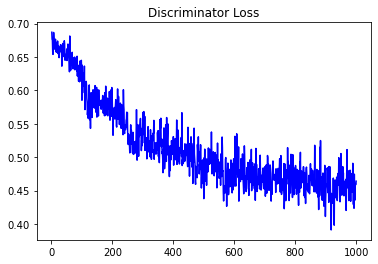

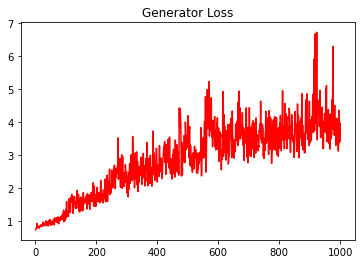

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.25648319428786637


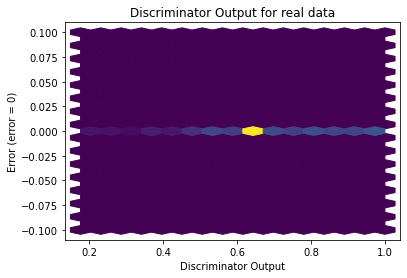

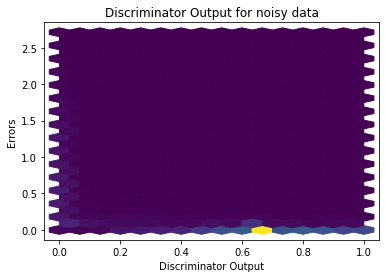

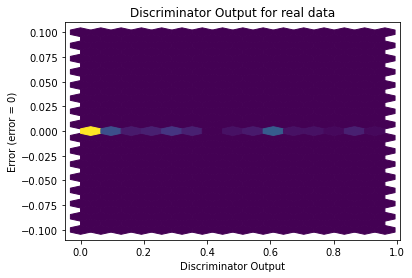

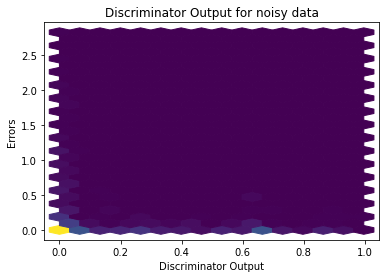

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())